<a href="https://colab.research.google.com/github/lee7py/2021-py-DNN/blob/main/code/6-3%20ch6_3_Fashion_MNIST_with_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
title: "Tensorflow 2.0 Tutorial ch6.3 - Fashion MNIST with CNN 실습"
date: 2020-04-21T10:08:30+09:00
tags:
  - "Deep Learning"
  - "Python"
  - "Google Colab"
  - "Tensorflow 2.0"
  - "Binary Classification"
  - "Classification"
  - "컨볼루션 신경망"
  - "Convolutional Neural Network"
  - "CNN"
  - "텐서플로 2.0"
  - "텐서플로 2.0 튜토리얼"
  - "Tensorflow 2.0 Tutorial"
categories:
  - "Deep Learning"
  - "딥러닝"
  - "텐서플로 2.0"
  - "Python"
  - "Tensorflow 2.0"
  - "텐서플로 2.0 튜토리얼"
  - "Tensorflow 2.0 Tutorial"
menu: 
  python:
    name: Tensorflow 2.0 Tutorial ch6.3 - Fashion MNIST with CNN 실습
---

## 공지

- 본 Tutorial은 교재 `시작하세요 텐서플로 2.0 프로그래밍`의 강사에게 국비교육 강의를 듣는 사람들에게 자료 제공을 목적으로 제작하였습니다. 

- 강사의 주관적인 판단으로 압축해서 자료를 정리하였기 때문에, 자세하게 공부를 하고 싶은 반드시 교재를 구매하실 것을 권해드립니다. 

![](/img/tensorflow2.0/book.jpg)<!-- -->


- 본 교재 외에 강사가 추가한 내용에 대한 Reference를 확인하셔서, 추가적으로 학습하시는 것을 권유드립니다. 


## Tutorial

이전 강의가 궁금하신 분들은 아래에서 선택하여 추가 학습 하시기를 바랍니다. 

- [Google Colab Tensorflow 2.0 Installation](https://chloevan.github.io/python/tensorflow2.0/googlecolab/)
- [Tensorflow 2.0 Tutorial ch3.3.1 - 난수 생성 및 시그모이드 함수](https://chloevan.github.io/python/tensorflow2.0/ch3_3_1_random_signoid/)
- [Tensorflow 2.0 Tutorial ch3.3.2 - 난수 생성 및 시그모이드 함수 편향성](https://chloevan.github.io/python/tensorflow2.0/ch3_3_2_random_signoid_bias/)
- [Tensorflow 2.0 Tutorial ch3.3.3 - 첫번째 신경망 네트워크 - AND](https://chloevan.github.io/python/tensorflow2.0/ch3_3_3_network_and/)
- [Tensorflow 2.0 Tutorial ch3.3.4 - 두번째 신경망 네트워크 - OR](https://chloevan.github.io/python/tensorflow2.0/ch3_3_4_network_or/)
- [Tensorflow 2.0 Tutorial ch3.3.5 - 세번째 신경망 네트워크 - XOR](https://chloevan.github.io/python/tensorflow2.0/ch3_3_5_network_xor/)
- [Tensorflow 2.0 Tutorial ch4.1 - 선형회귀](https://chloevan.github.io/python/tensorflow2.0/ch4_1_linear_regression/)
- [Tensorflow 2.0 Tutorial ch4.2 - 다항회귀](https://chloevan.github.io/python/tensorflow2.0/ch4_2_multiple_linear_regression/)
- [Tensorflow 2.0 Tutorial ch4.3 - 딥러닝 네트워크를 이용한 회귀](https://chloevan.github.io/python/tensorflow2.0/ch4_3_regression_with_deeplearning/)
- [Tensorflow 2.0 Tutorial ch4.4 - 보스턴 주택 가격 데이터세트](https://chloevan.github.io/python/tensorflow2.0/ch4_4_boston_housing_deeplearning/)
- [Tensorflow 2.0 Tutorial ch5.1 - 분류](https://chloevan.github.io/python/tensorflow2.0/ch5_1_binary_classification/)
- [Tensorflow 2.0 Tutorial ch5.2 - 다항분류](https://chloevan.github.io/python/tensorflow2.0/ch5_2_multi_classification/)
- [Tensorflow 2.0 Tutorial ch5.3 - Fashion MNIST](https://chloevan.github.io/python/tensorflow2.0/ch5_3_fashion_mnist/)
- [Tensorflow 2.0 Tutorial ch6.1-2 - CNN 이론](https://chloevan.github.io/python/tensorflow2.0/ch6_1_2_cnn_theory/)


## I. 개요

이번 장은 앞에서 이론만 설명했기 때문에 이번에는 실습 위주로 진행합니다. 컨볼루션 레이어와 풀링 레이어, 드롭아웃을 사용해서 분류 문제를 푸는데 어떻게 해야 성능이 개선 되는지 알아봅니다. 

## II. 데이터 불러오기 및 정규화
[5장](https://chloevan.github.io/python/tensorflow2.0/ch5_3_fashion_mnist/)에서 배운 내용을 근거로 데이터를 불러오고 정규화를 진행합니다.  

In [1]:
import tensorflow as tf
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_X, train_Y), (test_X, test_Y) = fashion_mnist.load_data()

train_X = train_X / 255.0
test_X = test_X / 255.0

4423680/4422102 [==============================] - 0s 0us/step


그런데, 6장에서는 `Conv2D`레이어로 컨볼루션 연산을 수행해야 합니다. 이미지는 보통 채널을 가지고 있고(컬러 이미지는 `RGB`의 3채널, 흑백 이미지는 1채널), `Conv2D`레이어는 채널을 가진 형태의 데이터를 받도록 기본적으로 설정되어 있기 때문에 예제 6.5에서는 채널을 갖도록 데이터의 `Shape`를 바꿔줍니다. 



In [ ]:
# reshape 이전
print(train_X.shape, test_X.shape)

train_X = train_X.reshape(-1, 28, 28, 1)
test_X = test_X.reshape(-1, 28, 28, 1)

# reshape 이후
print(train_X.shape, test_X.shape)

(60000, 28, 28) (10000, 28, 28)
(60000, 28, 28, 1) (10000, 28, 28, 1)


`Fashion MNIST`데이터를 구성하는 흑백 이미지는 1개의 채널을 갖기 때문에 `reshape()` 함수를 사용해 데이터의 가장 뒤쪽에 채널 차원을 추가합니다. 이 작업으로 데이터 수는 달라지지는 않습니다. 

데이터를 확인하는 시각화를 진행합니다. 

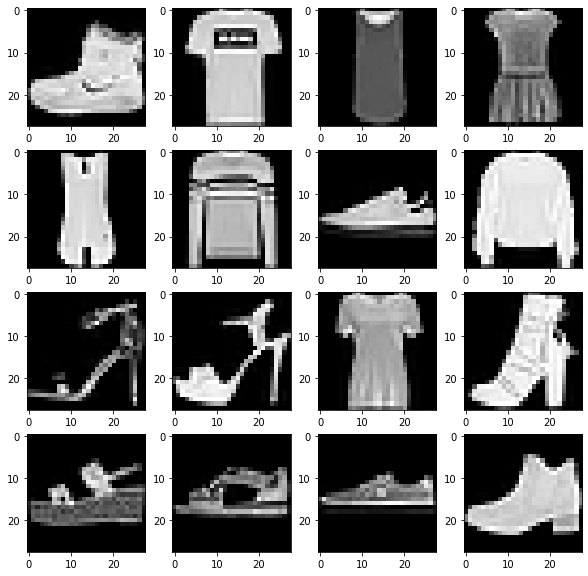

[9 0 0 3 0 2 7 2 5 5 0 9 5 5 7 9]


In [ ]:
import matplotlib.pyplot as plt

# 전체 그래프의 크기를 width = 10, height = 10으로 지정합니다. 
plt.figure(figsize=(10, 10))
for c in range(16): 
  # 4행 4열로 지정한 그리드에서 c+1번째의 칸에 그래프를 그립니다. 1~16번째 칸을 채우게 됩니다. 
  plt.subplot(4,4,c+1)
  plt.imshow(train_X[c].reshape(28,28), cmap='gray')

plt.show()

# 훈련 데이터이 1~16번째 까지의 라벨 프린트합니다. 
print(train_Y[:16])

라벨의 정의는 아래와 같습니다.

| 라벨 	| 범주 	|
|:----:	|:-----------:	|
| 0 	| 티셔츠/상의 	|
| 1 	| 바지 	|
| 2 	| 스웨터 	|
| 3 	| 드레스 	|
| 4 	| 코트 	|
| 5 	| 샌들 	|
| 6 	| 셔츠 	|
| 7 	| 운동화 	|
| 8 	| 가방 	|
| 9 	| 부츠 	|

라벨의 정의와 비교해보면, 라벨이 잘 분류되어 있는 것을 확인할 수 있습니다. 이제 모델을 생성합니다. 

## III. 딥러닝 모델 생성

### (1) 컨볼루션 신경망 모델 정의
컨볼루션 신경망 모델 정의는 풀링 레이어 또는 드롭아웃 없이 정의된 모델을 말합니다. 


In [ ]:
model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(input_shape=(28,28,1), kernel_size=(3,3), filters=16),
  tf.keras.layers.Conv2D(kernel_size=(3,3), filters=32), 
  tf.keras.layers.Conv2D(kernel_size=(3,3), filters=64), 
  tf.keras.layers.Flatten(), 
  tf.keras.layers.Dense(units=128, activation='relu'), 
  tf.keras.layers.Dense(units=10, activation='softmax')                             
])

model.summary()

model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 22, 22, 64)        18496     
_________________________________________________________________
flatten_1 (Flatten)          (None, 30976)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               3965056   
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 3,989,642
Trainable params: 3,989,642
Non-trainable params: 0
____________________________________________

`Conv2D`의 인수에 대해 정리하도록 합니다. 
- `kernel_size`: 필터 행렬의 크기를 말하며, 수용 영역(receptive filed)이라고 불리워집니다. 앞의 숫자는 높이, 뒤의 숫자는 너비이고, 숫자를 하나만 쓸 경우 높이와 너비를 동일한 값으로 사용한다는 뜻입니다.[^1]
- `filters`: 필터의 개수를 의미하며, 네트워크가 깊어질수록 2배씩 늘려나갑니다. 

[^1]: 이 부분은 교재 p. 145~147에 이미지로 설명이 잘 되어 있으니 참고하기를 바랍니다. 

In [ ]:
!nvidia-smi

Fri Aug  7 05:19:17 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.57       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P0    60W / 149W |    199MiB / 11441MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

위 명령어는 현재 구글 코랩에서 지원하는 GPU의 성능입니다. `Tesla K80`을 사용하고 있습니다. 

구글 코랩에서는 무료로 GPU를 사용할 수 있도록 도와줍니다. 하드웨어 가속기를 사용하려면 [메뉴]-[런타임]-[런타임 유형 변경]-[하드웨어 가속기]-[GPU]로 지정하면 됩니다. 

## (2) 컨볼루션 신경망 모델 학습

신경망 모형을 학습하는데, 시간이 조금 소요되니 참고바란다. (약 10분)

In [ ]:
history = model.fit(train_X, train_Y, epochs=25, validation_split=0.25)

Epoch 1/25
1407/1407 [==============================] - 13s 9ms/step - loss: 0.4674 - accuracy: 0.8337 - val_loss: 0.3958 - val_accuracy: 0.8545
Epoch 2/25
1407/1407 [==============================] - 13s 9ms/step - loss: 0.3421 - accuracy: 0.8771 - val_loss: 0.3999 - val_accuracy: 0.8579
Epoch 3/25
1407/1407 [==============================] - 13s 9ms/step - loss: 0.2912 - accuracy: 0.8924 - val_loss: 0.3830 - val_accuracy: 0.8690
Epoch 4/25
1407/1407 [==============================] - 13s 9ms/step - loss: 0.2501 - accuracy: 0.9088 - val_loss: 0.4692 - val_accuracy: 0.8589
Epoch 5/25
1407/1407 [==============================] - 13s 9ms/step - loss: 0.2202 - accuracy: 0.9182 - val_loss: 0.3895 - val_accuracy: 0.8707
Epoch 6/25
1407/1407 [==============================] - 13s 9ms/step - loss: 0.1875 - accuracy: 0.9303 - val_loss: 0.4352 - val_accuracy: 0.8697
Epoch 7/25
1407/1407 [==============================] - 13s 9ms/step - loss: 0.1665 - accuracy: 0.9386 - val_loss: 0.4772 - val_ac

이렇게 생성된 모형은 시각화로 다시 확인한다. 

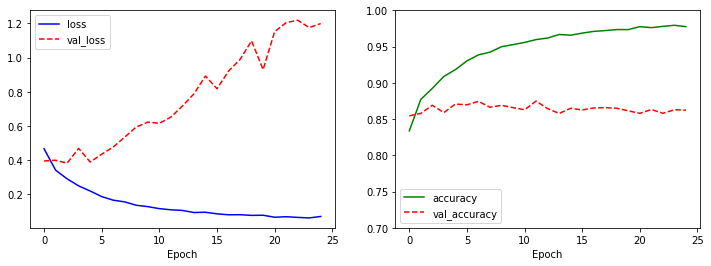

[1.2857884168624878, 0.8600000143051147]

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'r--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

model.evaluate(test_X, test_Y, verbose=0)

왼쪽 그래프를 확인하면, `loss`는 감소하고, 대신 `var_loss`는 증가하는 전형적인 과적합의 형태를 나타냅니다. 이럴경우 모형에도 악영향이 있어서, 오히려 단순 딥러닝 모형의 성과가 더 좋은 것을 확인할 수 있습니다. 

- 테스트 데이터의 85.21% Vs. 5.3장의 Dense Layer 88.5%

즉, 컨볼루션 레이어만 사용할 경우, 오히려 성능이 더 좋지 않은 것을 확인할 수 있었습니다. 이제 성능을 개선해봅니다. 

### (3) 풀링 레이어, 드롭아웃 레이어 추가 (약 10분)


In [ ]:
model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(input_shape=(28,28,1), kernel_size=(3,3), filters=32), 
  tf.keras.layers.MaxPool2D(strides=(2,2)), 
  tf.keras.layers.Conv2D(kernel_size=(3,3), filters=64), 
  tf.keras.layers.MaxPool2D(strides=(2,2)), 
  tf.keras.layers.Conv2D(kernel_size=(3,3), filters=128), 
  tf.keras.layers.Flatten(), 
  tf.keras.layers.Dense(units=128, activation='relu'), 
  tf.keras.layers.Dropout(rate=0.3),
  tf.keras.layers.Dense(units=10, activation='softmax')                             
])

model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
flatten_2 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)              

이번에 추가된 인수는 `MaxPool2D(strides=(2,2)`)와 `Dropout(rate=0.3)`입니다. 
- strides: 필터가 계산 과정에서 한 스텝마다 이동하는 크기입니다. 기본값은 (1,1)이고, (2,2) 등으로 설정할 경우 한 칸씩 건너뛰면서 계산하게 되니다. strides=1일 때와 2일 때의 결과 이미지의 크기에 영향을 줍니다. 
- rate: 제외할 뉴런의 비율을 나타냅니다. 

여기서 확인해야 하는 개수 `Param`의 개수입니다. 

기존 `3,989,642`에서 `241,546`으로 대폭 줄어든 것을 확인할 수 있습니다. 이는 `Flatten`에 들어오는 `Params`의 개수가 기존 `(None, 30976)`에 비해 `(None, 1152)`에 비해 크게 줄어들었기 때문입니다. 

다시한번, 풀링 레이어와 드롭아웃 레어는 모두 과적합을 줄이는 데 기여합니다. 

In [ ]:
history = model.fit(train_X, train_Y, epochs=10, validation_split=0.25)

Epoch 1/10
1407/1407 [==============================] - 12s 8ms/step - loss: 0.5242 - accuracy: 0.8105 - val_loss: 0.3587 - val_accuracy: 0.8688
Epoch 2/10
1407/1407 [==============================] - 11s 8ms/step - loss: 0.3564 - accuracy: 0.8713 - val_loss: 0.3231 - val_accuracy: 0.8827
Epoch 3/10
1407/1407 [==============================] - 11s 8ms/step - loss: 0.3165 - accuracy: 0.8851 - val_loss: 0.3097 - val_accuracy: 0.8839
Epoch 4/10
1407/1407 [==============================] - 11s 8ms/step - loss: 0.2915 - accuracy: 0.8937 - val_loss: 0.2979 - val_accuracy: 0.8881
Epoch 5/10
1407/1407 [==============================] - 11s 8ms/step - loss: 0.2675 - accuracy: 0.9018 - val_loss: 0.3030 - val_accuracy: 0.8877
Epoch 6/10
1407/1407 [==============================] - 12s 8ms/step - loss: 0.2532 - accuracy: 0.9061 - val_loss: 0.3009 - val_accuracy: 0.8931
Epoch 7/10
1407/1407 [==============================] - 12s 8ms/step - loss: 0.2350 - accuracy: 0.9124 - val_loss: 0.3011 - val_ac

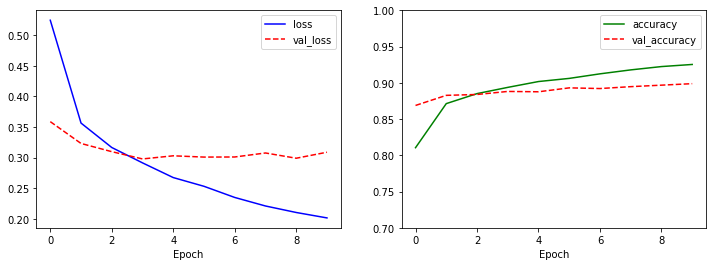

[0.37384751439094543, 0.8984666466712952]

In [ ]:
# history = model.fit(train_X, train_Y, epochs=25, validation_split=0.25)

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'r--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

model.evaluate(test_X, test_Y, verbose=0)

var_loss는 여전히 증가하지만, `val_accuracy`는 일정한 수준에 머무르고 있습니다. 분류 성적도 `89.06%`로 약 `0.4%` 높은 수치가 나옵니다 (종전: `88.77%`). 그러나, 확실히 컨볼루션 레이어만 활용했을 때 보다는 확실히 좋은 결과가 나온 것을 확인할 수 있습니다. 

이보다 더 좋은 성과를 낼 수 있습니다. Fashion MNIST의 공식 깃허브 저장소에는 테스트 데이터 분류 성적이 95% 이상을 달성한 방법들도 존재합니다. [^2]

## IV. 연습 파일
- [구글 Colab에서 직접 연습해보자](https://colab.research.google.com/github/chloevan/deeplearningAI/blob/master/tensorflow2.0/ch6_3_Fashion_MNIST_with_CNN.ipynb) 

## V. Reference

김환희. (2020). 시작하세요! 텐서플로 2.0 프로그래밍: 기초 이론부터 실전 예제까지 한번에 끝내는 머신러닝, 딥러닝 핵심 가이드. 서울: 위키북스.


[^2]: https://github.com/zalandoresearch/fashion-mnist#benchmark 파이썬 실력이 되시는 분들은 95%이상의 성능을 보유한 Repo에 있는 코드를 직접 가져와 응용하는 것도 큰 도움이 될 수 있습니다. 